In [70]:
import numpy as np
import warnings
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import skew, norm
from sklearn.neighbors import KNeighborsRegressor

warnings.filterwarnings(action="ignore")
%matplotlib inline

input_path1 = '/home/vivana/projects/ml-basics/housing/dataset/'

In [71]:
house_data = pd.read_csv(input_path1 + 'AmesHousing.csv')
test = pd.read_csv(input_path1 + 'test.csv')
copied_house_data = house_data.copy()
copied_house_data.columns = copied_house_data.columns.str.replace(' ', '')
copied_house_data.describe()

,Order,PID,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemod/Add,MasVnrArea,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


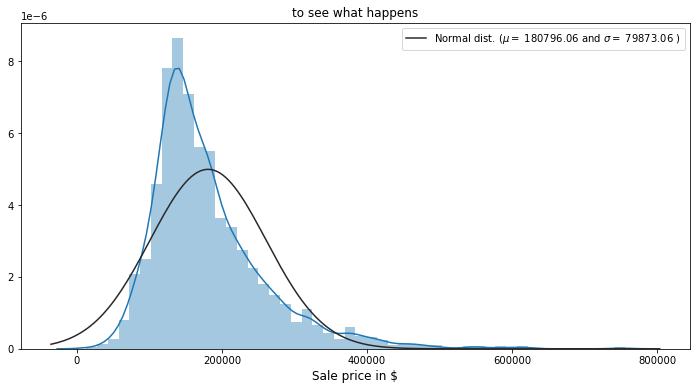

In [72]:
# let's visualize our dataset and analys them -> EDA
(mu, sigma) = norm.fit(copied_house_data['SalePrice'])

plt.figure(figsize=(12,6))
sns.distplot(copied_house_data['SalePrice'], kde = True, hist=True, fit = norm) #it lets you draw a diagram with lines on it
plt.xlabel('Sale price in $', fontsize = 12)
plt.title('to see what happens', fontsize=12)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
           loc='best')

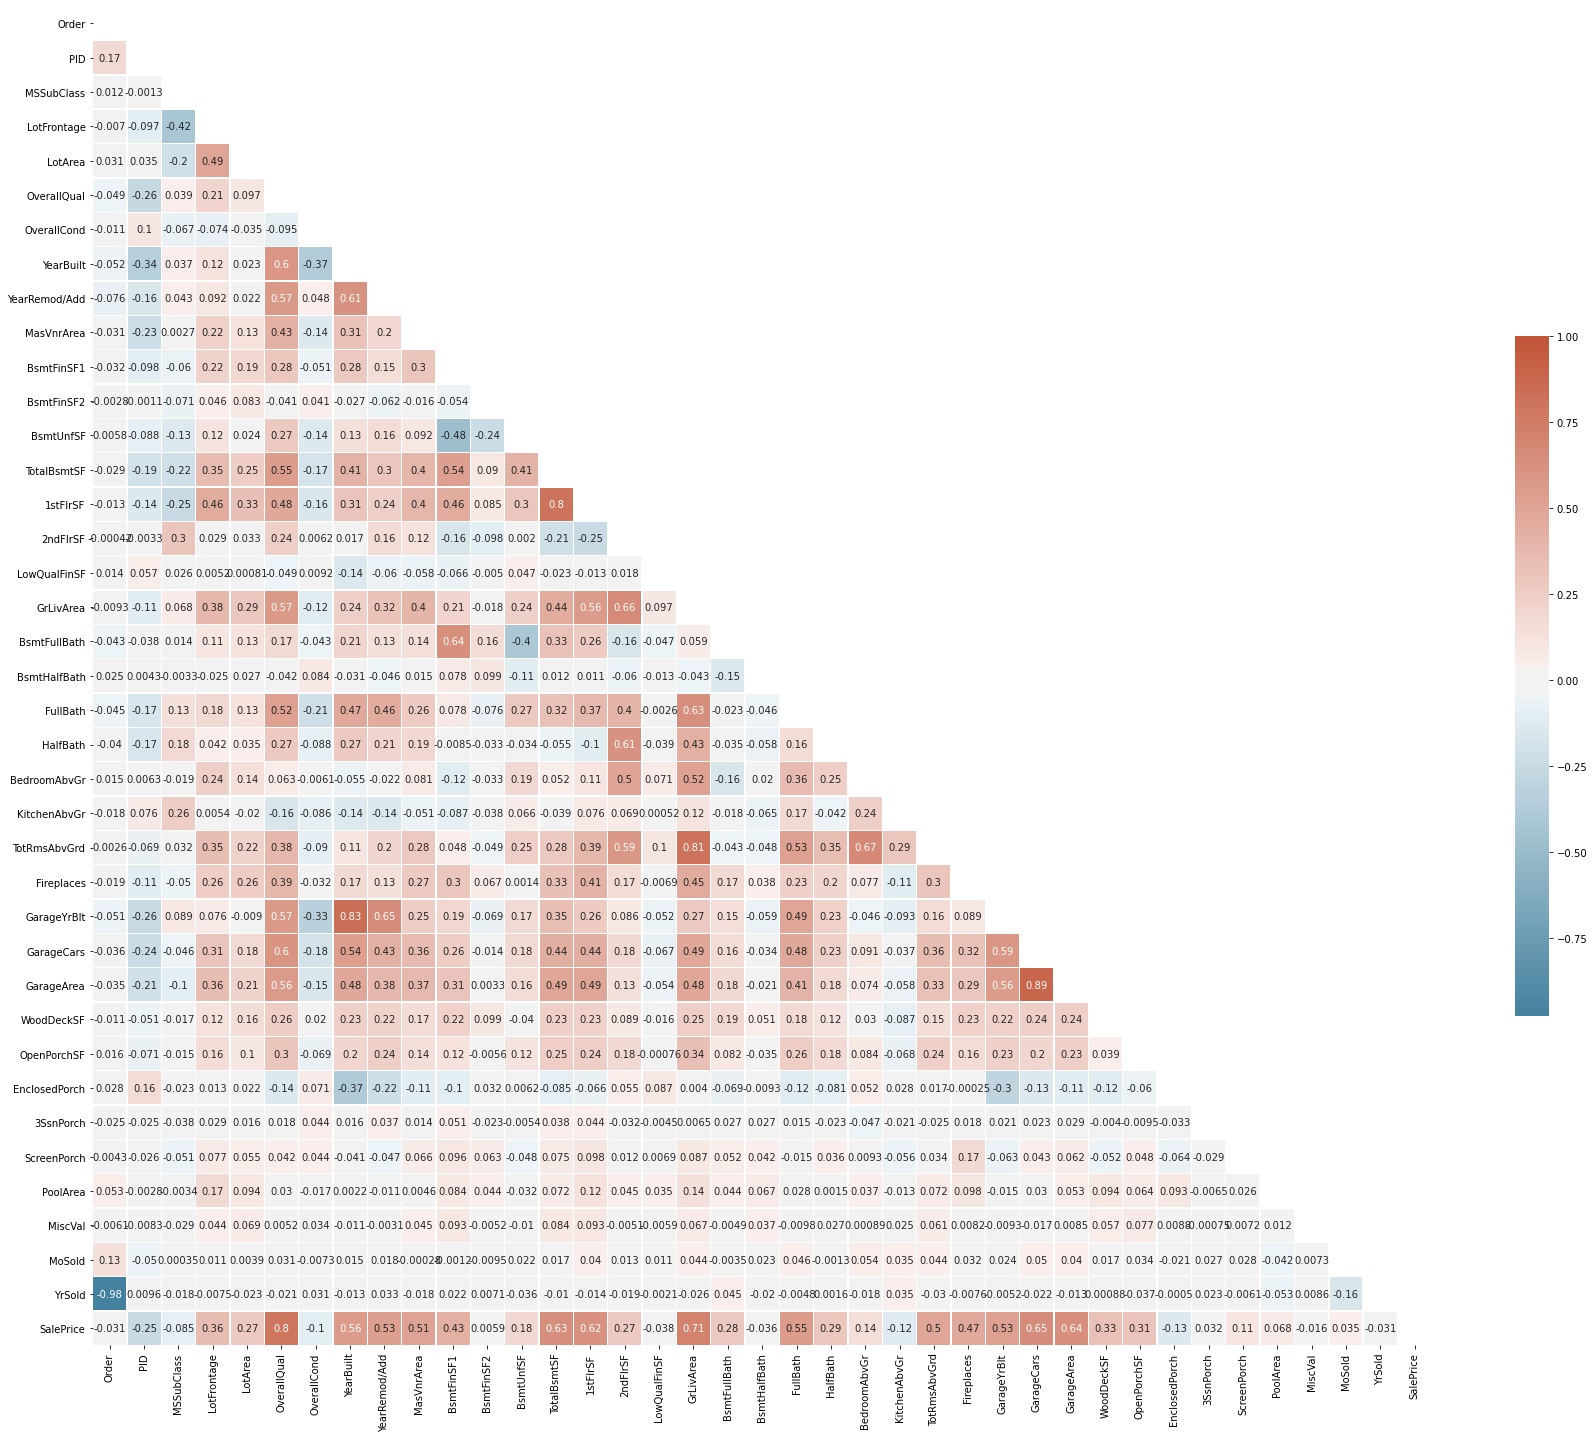

In [73]:
#correlation matrix
f, ax = plt.subplots(figsize = (30,25))
mat = copied_house_data.corr('pearson')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

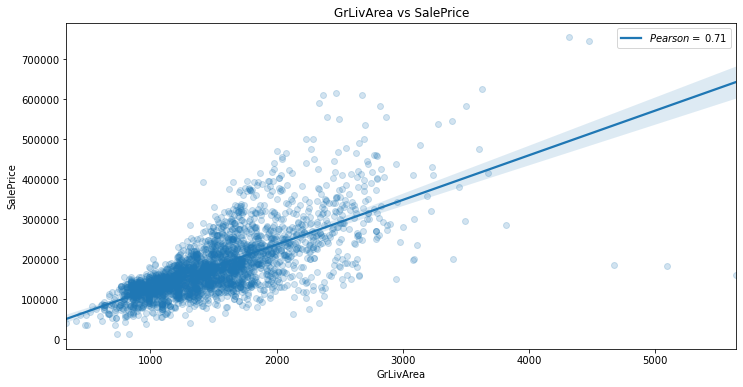

In [74]:
pearson_g = 0.71
plt.figure(figsize=(12,6))
sns.regplot(data=copied_house_data, x = 'GrLivArea', y = 'SalePrice', scatter_kws={'alpha':0.2})
plt.title('GrLivArea vs SalePrice', fontsize = 12)
plt.legend(['$Pearson=$ {:.2f}'.format(pearson_g)], loc = 'best')
plt.show()

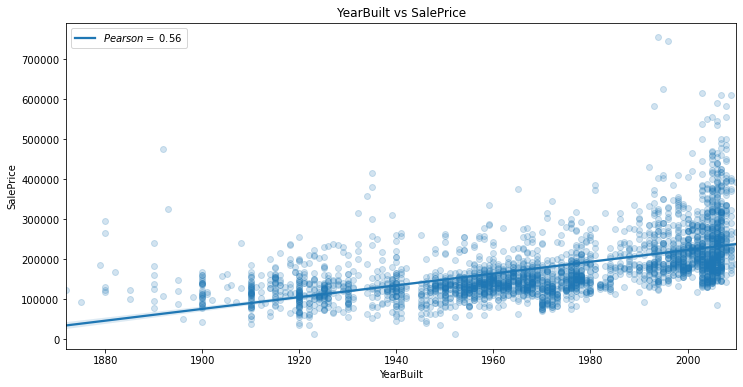

In [75]:
pearson_yearBuilt = 0.56
plt.figure(figsize=(12,6))
sns.regplot(data=copied_house_data, x = 'YearBuilt', y = 'SalePrice', scatter_kws={'alpha': 0.2})
plt.title('YearBuilt vs SalePrice', fontsize = 12)
plt.legend(['$Pearson=$ {:.2f}'.format(pearson_yearBuilt)], loc = 'best')
plt.show()

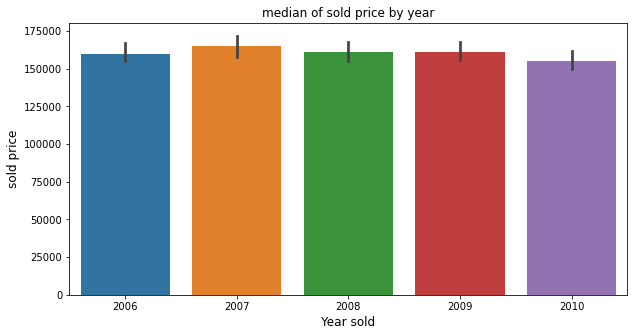

In [76]:
plt.figure(figsize=(10,5))
sns.barplot(x='YrSold', y='SalePrice', data=copied_house_data, estimator=np.median)
plt.title('median of sold price by year', fontsize = 12)
plt.xlabel('Year sold', fontsize = 12)
plt.ylabel('sold price', fontsize = 12)
plt.show()

In [77]:
#Data processing
target = copied_house_data['SalePrice']
test_id = test['Id']
test = test.drop(['Id'], axis = 1)
new_dataframe = copied_house_data.drop(['SalePrice', 'Order', 'PID'], axis = 1)
train_and_test = pd.concat([new_dataframe, test], axis = 0, sort = False)
train_and_test.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemod/Add,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,YearRemodAdd
count,4389.00000,3672.000000,4389.000000,4389.000000,4389.000000,4389.000000,2930.000000,4351.000000,4387.000000,4387.000000,...,4389.000000,4389.000000,4389.000000,4389.000000,4389.000000,4389.000000,4389.000000,4389.000000,4389.000000,1459.000000
mean,57.38437,69.008442,10038.634541,6.089542,5.560036,1971.356801,1984.266553,101.502643,441.490996,50.685206,...,93.560036,47.792891,23.421053,2.327182,16.355206,2.077466,53.139212,6.178856,2007.783550,1983.662783
std,42.66937,23.037371,7044.993407,1.419506,1.112151,30.290079,20.860286,178.601035,455.434541,171.711906,...,126.808816,67.945124,65.176973,23.616631,56.257339,33.982520,588.495661,2.717335,1.311576,21.130467
min,20.00000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,1950.000000
25%,20.00000,58.000000,7424.000000,5.000000,5.000000,1953.000000,1965.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,1963.000000
50%,50.00000,68.000000,9430.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,363.000000,0.000000,...,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,1992.000000
75%,70.00000,80.000000,11553.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,739.000000,0.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,2004.000000
max,190.00000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,2010.000000


In [78]:
#cleaning NaNs
nan = pd.DataFrame(train_and_test.isna().sum(), columns=['NaN_sum'])
nan['feat'] = nan.index
nan['Percent'] = (nan['NaN_sum']/1458)*100
nan = nan[nan['NaN_sum'] > 0]
nan = nan.sort_values(by = ['NaN_sum'])
nan['Usability'] = np.where(nan['Percent'] > 20, 'discard', 'keep')

nan

,NaN_sum,feat,Percent,Usability
Exterior1st,1,Exterior1st,0.068587,keep
Exterior2nd,1,Exterior2nd,0.068587,keep
KitchenQual,1,KitchenQual,0.068587,keep
Electrical,1,Electrical,0.068587,keep
SaleType,1,SaleType,0.068587,keep
TotalBsmtSF,2,TotalBsmtSF,0.137174,keep
GarageArea,2,GarageArea,0.137174,keep
GarageCars,2,GarageCars,0.137174,keep
Utilities,2,Utilities,0.137174,keep
Functional,2,Functional,0.137174,keep


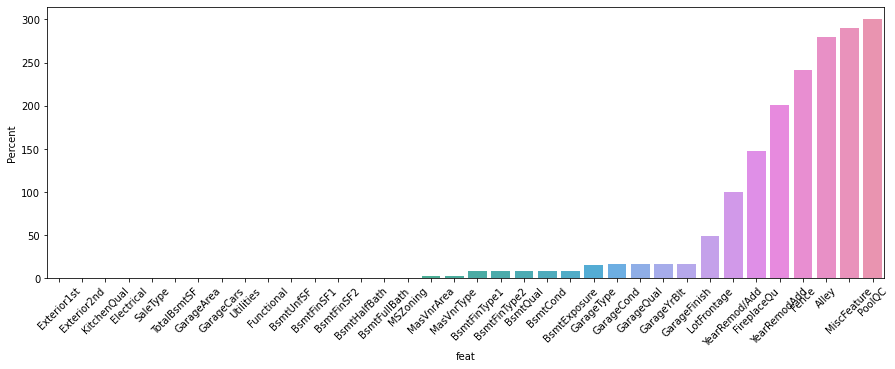

In [79]:
plt.figure(figsize=(15,5))
sns.barplot(x = nan['feat'], y = nan['Percent'])
plt.xticks(rotation = 45)
plt.show()

In [81]:
train_and_test['MSSubClass'] = train_and_test['MSSubClass'].apply(str)
train_and_test['YrSold'] = train_and_test['YrSold'].apply(str)
train_and_test['MoSold'] = train_and_test['MoSold'].apply(str)

#filling NaNs based on description file
train_and_test['Functional'] = train_and_test['Functional'].fillna('Typ')
train_and_test['Electrical'] = train_and_test['Electrical'].fillna('SBrKr')
train_and_test['KitchenQual'] = train_and_test['KitchenQual'].fillna('TA')
train_and_test['Exterior1st'] = train_and_test['Exterior1st'].fillna(train_and_test['Exterior1st']).mode()[0]
train_and_test['Exterior2nd'] =  train_and_test['Exterior2nd'].fillna(train_and_test['Exterior2nd']).mode()[0]
train_and_test['SaleType'] = train_and_test['SaleType'].fillna(train_and_test['SaleType'].mode()[0])
train_and_test["PoolQC"] = train_and_test["PoolQC"].fillna("None")
train_and_test["Alley"] = train_and_test["Alley"].fillna("None")
train_and_test['FireplaceQu'] = train_and_test['FireplaceQu'].fillna("None")
train_and_test['Fence'] = train_and_test['Fence'].fillna("None")
train_and_test['MiscFeature'] = train_and_test['MiscFeature'].fillna("None")

for col in ('GarageArea', 'GarageCars'):
    train_and_test[col] = train_and_test[col].fillna(0)
    
for col in ('BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train_and_test[col] = train_and_test[col].fillna('None')
    
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    train_and_test[col] = train_and_test[col].fillna('None')

    
for col in train_and_test:
    if train_and_test[col].isna().sum() > 0:
        print(train_and_test[col][0])
        


0    RL
0    RH
Name: MSZoning, dtype: object
0    141.0
0     80.0
Name: LotFrontage, dtype: float64
0    AllPub
0    AllPub
Name: Utilities, dtype: object
0    1960.0
0       NaN
Name: YearRemod/Add, dtype: float64
0    Stone
0     None
Name: MasVnrType, dtype: object
0    112.0
0      0.0
Name: MasVnrArea, dtype: float64
0    639.0
0    468.0
Name: BsmtFinSF1, dtype: float64
0      0.0
0    144.0
Name: BsmtFinSF2, dtype: float64
0    441.0
0    270.0
Name: BsmtUnfSF, dtype: float64
0    1080.0
0     882.0
Name: TotalBsmtSF, dtype: float64
0    1.0
0    0.0
Name: BsmtFullBath, dtype: float64
0    0.0
0    0.0
Name: BsmtHalfBath, dtype: float64
0    1960.0
0    1961.0
Name: GarageYrBlt, dtype: float64
0       NaN
0    1961.0
Name: YearRemodAdd, dtype: float64


In [83]:
#remove the useless variables to ease your anaysis
useless = ['GarageYrBlt','YearRemodAdd']
train_and_test = train_and_test.drop(useless, axis=1)

#imputing with KNN. it means we're replacing missed values with an appropriate values.

def impute_knn(dataframe):
    ttn = train_and_test.select_dtypes(include=[np.number])
    ttc = train_and_test.select_dtypes(exclude=[np.number])
    
    
    cols_nan = ttn.columns[ttn.isna().any()].tolist()         
    cols_no_nan = ttn.columns.difference(cols_nan).values
    
    
    for col in cols_nan:
        imp_test = ttn[ttn[col].isna()]
        imp_train = ttn.dropna()
        
        model = KNeighborsRegressor(n_neighbors=5)
        knr = model.fit(imp_train[cols_no_nan], imp_train[col])
        ttn.loc[ttn[col].isna(), col] = knr.predict(imp_test[cols_no_nan])
        
        
    return pd.concat([ttn, ttc], axis = 1)


train_and_test = impute_knn(train_and_test) 
    

objects = []
for i in train_and_test.columns:
    if train_and_test[i].dtype == object:
        objects.append(i)
train_and_test.update(train_and_test[objects].fillna('None'))

for col in train_and_test:
    if train_and_test[col].isna().sum()>0:
        print(train_and_test[col][0])